# Importing neccessary libraries and dataset

In [65]:
!pip install contractions
!pip install nltk
!pip install autocorrect 
!pip install --upgrade matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/19/e5/a4ea514515f270224435c69359abb7a3d152ed31b9ee3ba5e63017461945/matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.1
    Uninstalling matplotlib-3.8.1:
      Successfully uninstalled matplotlib-3.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.10.0 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyterlab~=3.4, but you have jupy

In [66]:
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

#Libraries for general purpose
import matplotlib.pyplot as plt
import seaborn as sns


#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
import os
count = 0
for root, folders, filenames in os.walk('/kaggle/input/'):
   print(root, folders)

/kaggle/input/ ['privatetweets']
/kaggle/input/privatetweets []


In [68]:
import numpy as np
import pandas as pd
df = pd.read_csv('/kaggle/input/privatetweets/tweets.csv')
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

**There is not much imbalance between different cyberbulling type. other_cyberbulling will be removed since it may cause a confusion for the models with other cyberbullying class.**

In [69]:
df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion             7998
age                  7992
gender               7973
ethnicity            7961
not_cyberbullying    7945
Name: count, dtype: int64

# Dataset Preprocessing

In [70]:
# Renaming Categories
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})

In [71]:
# Checking 10 samples
df.sample(10)

,text,sentiment
45287,"Ik, but ur still not getting my point. This is...",ethnicity
14518,What's that thing they say about blondes?...so...,gender
2413,Just have to go through my two most boring cla...,not_cyberbullying
3013,@truaemusic @mattybboi83 @Number10gov What are...,not_cyberbullying
9071,For context. Their last video was just a gay/r...,gender
17576,Last time i spoke to that IDIOT SHEM BOOTH SPA...,religion
22561,and all u have to b a muslim to defend jinnah ...,religion
43254,Guess you might nt have been around when T & h...,ethnicity
47359,Bitch. Slut. Fuck. Suck. Dick. Stupid. Bop. Bi...,ethnicity
33698,Well let’s see... alr I have to do maths.... f...,age


**Converting categories into numbers**

In [72]:
df["sentiment"].replace({"religion": 1, "age": 2, "gender": 3, "ethnicity": 4, "not_cyberbullying": 5}, inplace=True)

In [73]:
sentiments = ["religion","age","gender","ethnicity","not bullying"]

**Preprocessing: Tokenize sentences, Change to lower case, Correct spelling, Remove numbers, Remove punctuation, Remove stopwords, Normalize (Lemmatize or Lemmatization)**

In [74]:
!pip install emoji

**Predefined functions for text cleaning**

In [76]:
#Text cleaning
import re, string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Clean emojis from text
#def strip_emoji(text):
    #return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji


def strip_emoji(text):
    # Replace emojis with their text representation
    return emoji.demojize(text)

#Remove punctuations, links, stopwords, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14) # remove words longer than 14 characters
    return text

#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

#Lemmatization 
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

#Then we apply all the defined functions in the following order
def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

In [77]:
texts_cleaned = []
for t in df.text:
    texts_cleaned.append(preprocess(t))

In [78]:
df['text_clean'] = texts_cleaned

**Clean text**

In [79]:
df.head()

,text,sentiment,text_clean
0,"In other words #katandandre, your food was cra...",5,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,5,aussietv white mkr theblock today sunris studi...
2,@XochitlSuckkks a classy whore? Or more red ve...,5,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",5,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,5,isi account pretend kurdish account like islam...


**Checking tweet duplicates**

In [80]:
df["text_clean"].duplicated().sum()

1037

**There are around 1000 duplicates. We will remove them at the next cell.**

In [81]:
df.drop_duplicates("text_clean", inplace=True)

In [82]:
df.sentiment.value_counts()

sentiment
1    7946
2    7884
4    7746
5    7645
3    7611
Name: count, dtype: int64

**After removing duplicates, the value counts per sentiment is shown above. </br>
There is only a few difference (350) on the sentiment with most text and the sentiment with least text so there is no major imbalance on the data.**

# Checking tweet length

In [83]:
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [84]:
df['text_len'] = text_len

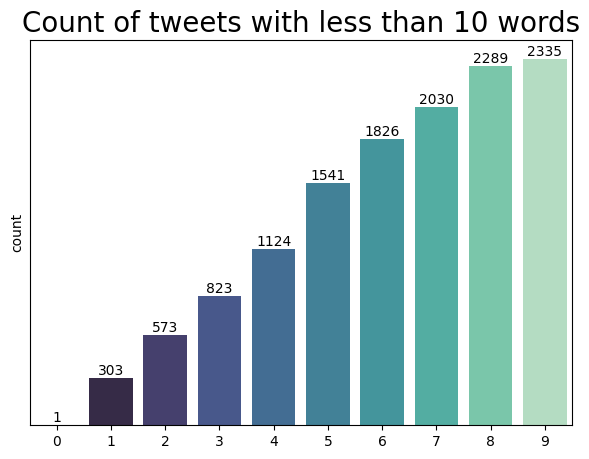

In [85]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [86]:
# checking long tweets
df.sort_values(by=['text_len'], ascending=False)

,text,sentiment,text_clean,text_len
44035,You so black and white trying to live like a n...,4,black white tri live like nigger pahahahaha co...,187
45165,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",4,fuck obama dumb ass nigger bitch ltthi whore s...,162
1317,@EurekAlertAAAS: Researchers push to import to...,5,research push import top antibulli program us ...,137
33724,"... I don't feel guilty for killing him, I jus...",2,feel guilti kill feel guilti enjoy torment sin...,137
47037,@Purely_Ambition: Sooo mad. RT @TracePeterson ...,4,sooo mad rt fuck obama dumb nigger go switzerl...,125
...,...,...,...,...
1529,@katrus my hair!,5,hair,1
5667,@islam4libya5 What's wrong with that?,5,wrong,1
14918,@justcurious5432 @JustLaurenB Feminism.,3,femin,1
4485,@youngesttyler school :-/,5,school,1


**Removing tweets with less than 4 words and more than 100 words as they can be outliers**

In [87]:
df = df[df['text_len'] > 3]
df = df[df['text_len'] < 100]

In [88]:
df

,text,sentiment,text_clean,text_len
0,"In other words #katandandre, your food was cra...",5,word katandandr food crapilici mkr,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,5,aussietv white mkr theblock today sunris studi...,10
2,@XochitlSuckkks a classy whore? Or more red ve...,5,classi whore red velvet cupcak,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",5,meh p thank head concern anoth angri dude twitter,9
4,@RudhoeEnglish This is an ISIS account pretend...,5,isi account pretend kurdish account like islam...,8
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,black ppl expect anyth depend anyth yet free p...,21
47688,Turner did not withhold his disappointment. Tu...,4,turner withhold turner call court abomin concl...,28
47689,I swear to God. This dumb nigger bitch. I have...,4,swear god dumb nigger bitch got bleach hair re...,13
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,yea fuck rt your nigger fuck unfollow fuck dum...,10


# Creating a word cloud

In [89]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image

**0 - religion </br>
1 - age  </br> 
2 - gender </br>
3 - ethnicity </br>
4 - cyberbullying**

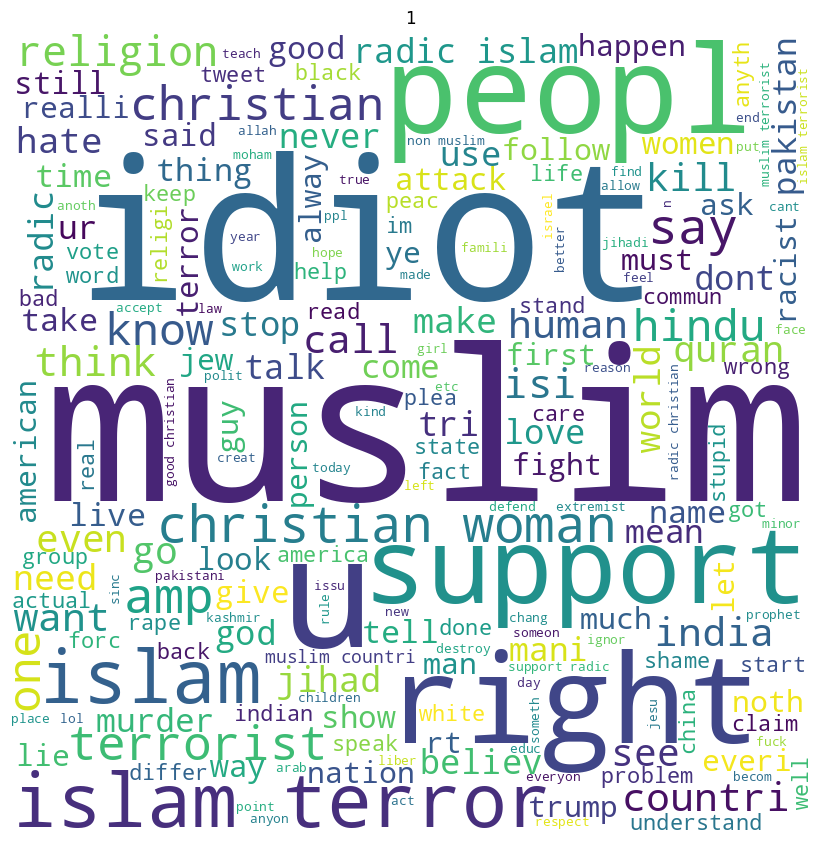

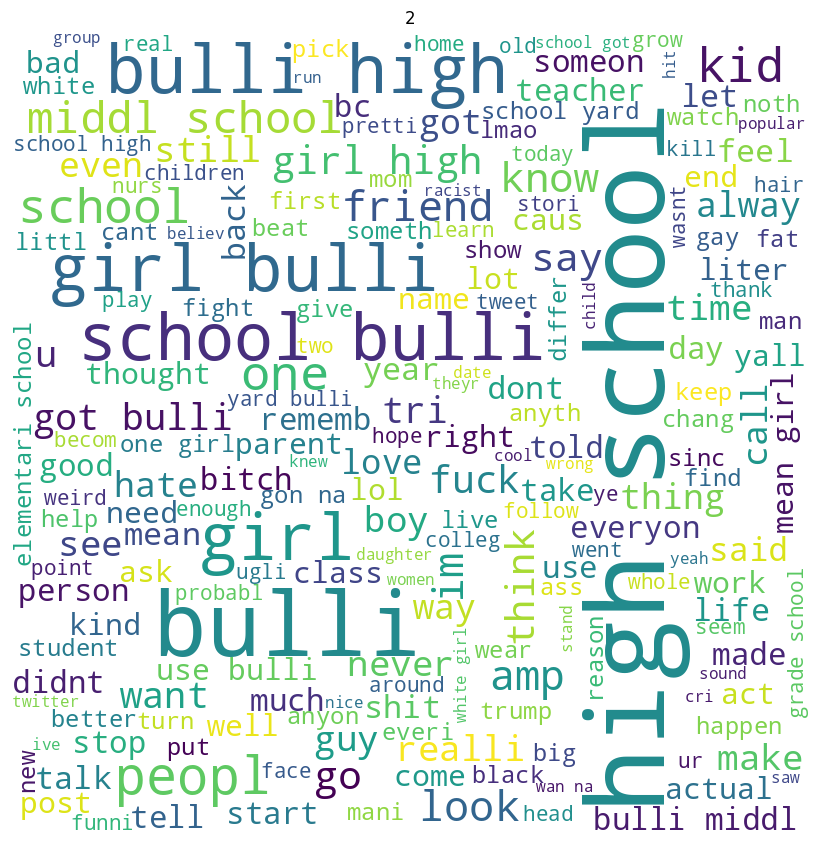

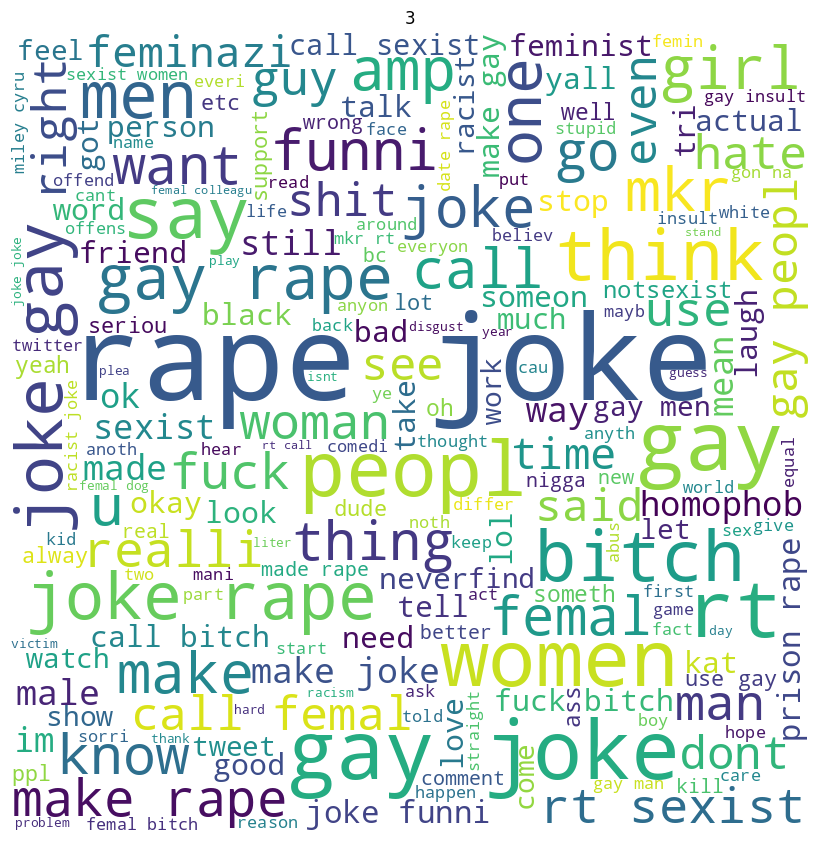

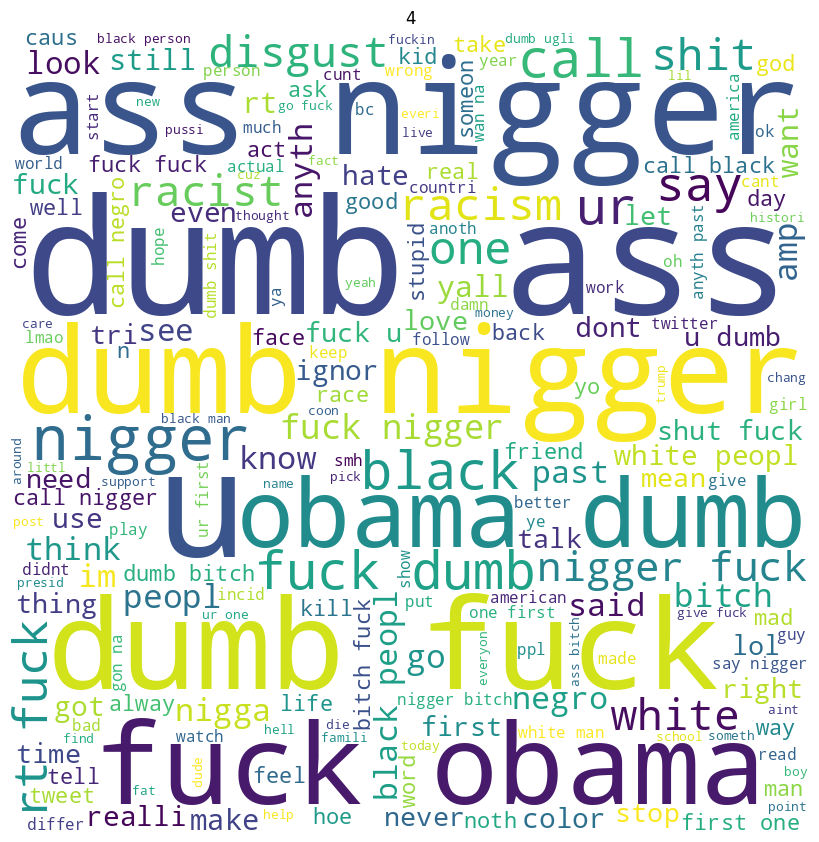

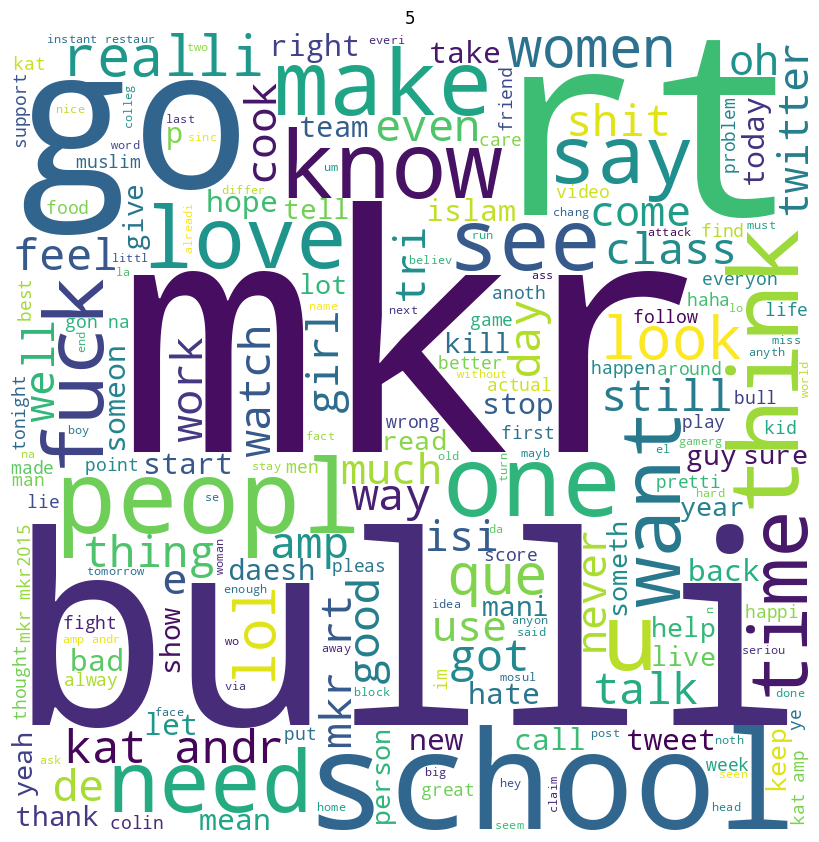

In [90]:
#@title
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()
df.sentiment = lenc.fit_transform(df.sentiment)

for c in range(len(lenc.classes_)):
    string = ""
    for i in df[df.sentiment == c].text_clean.values:
        string = string + " " + i.strip()

    #custom_mask = np.array(Image.open('../input/twitter-pic/twitter.png')) 
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
              #  mask = custom_mask,
                min_font_size = 10).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

# Train test split

# SMOTE

# Model Training

In [91]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming 'df' is your dataframe with 'text_clean' and 'sentiment' columns

tfidf = TfidfTransformer()
clf = CountVectorizer()

X_cv = clf.fit_transform(df['text_clean'])

tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

# train and test
X_train, X_test, y_train, y_test = train_test_split(X_tf, df['sentiment'], test_size=0.20, stratify=df['sentiment'], random_state=42)

# Use SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define classifiers
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
xgb = XGBClassifier(eval_metric="mlogloss", random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42)
nb = MultinomialNB()
mlp = MLPClassifier(random_state=42)

clfs = {
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "AdaBoost": ada,
    "LightGBM": lgb,
    "XGBoost": xgb,
    "Decision Tree": dt,
    "Support Vector Machine": svc,
    "Naive Bayes": nb,
    "Multilayer Perceptron": mlp
}

def fit_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    X_test_transformed = tf_transformer.transform(X_test)
    y_pred = clf.predict(X_test_transformed)
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

accuracies = []

for name, clf in clfs.items():
    curr_acc = fit_model(clf, X_train_resampled, y_train_resampled, X_test, y_test)
    accuracies.append(curr_acc)

models_df = pd.DataFrame({"Models": clfs.keys(), "Accuracy Scores": accuracies}).sort_values('Accuracy Scores', ascending=False)
print(models_df)


                   Models  Accuracy Scores
4                 XGBoost         0.844983
7             Naive Bayes         0.825724
0           Random Forest         0.813468
3                LightGBM         0.802963
5           Decision Tree         0.771448
1       Gradient Boosting         0.764848
2                AdaBoost         0.753939
6  Support Vector Machine         0.749764
8   Multilayer Perceptron         0.748822


## Confusion Matrix

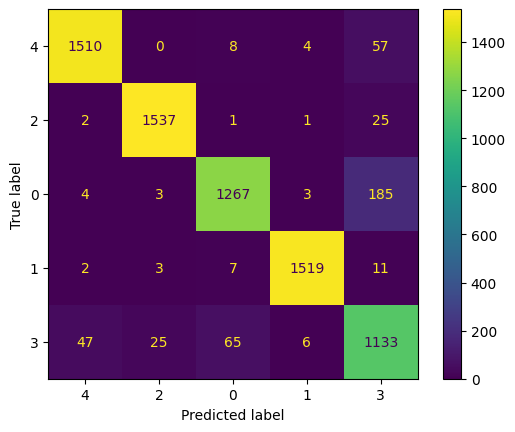

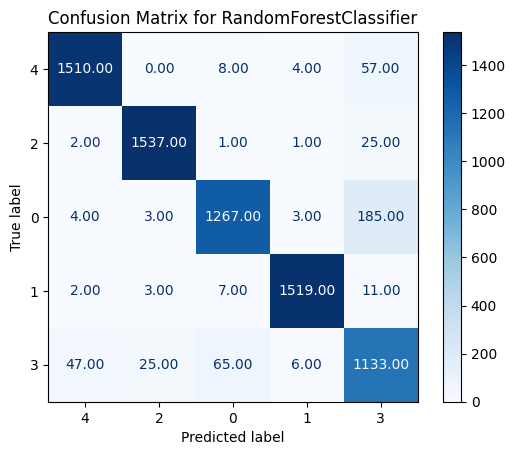

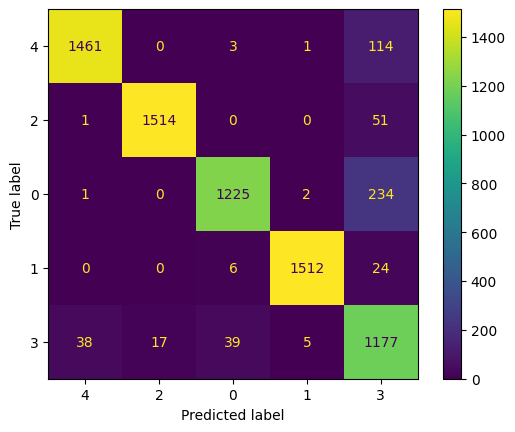

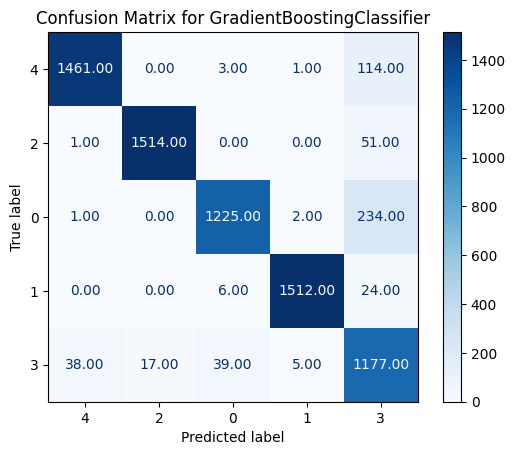

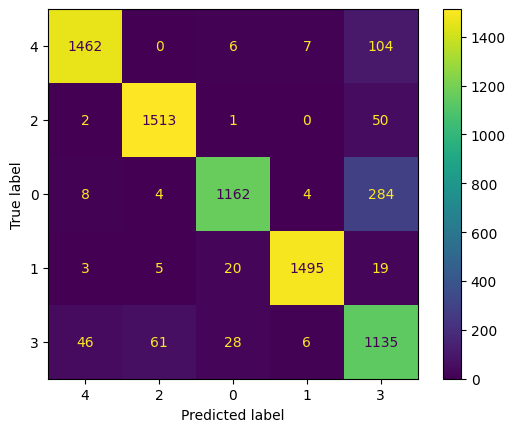

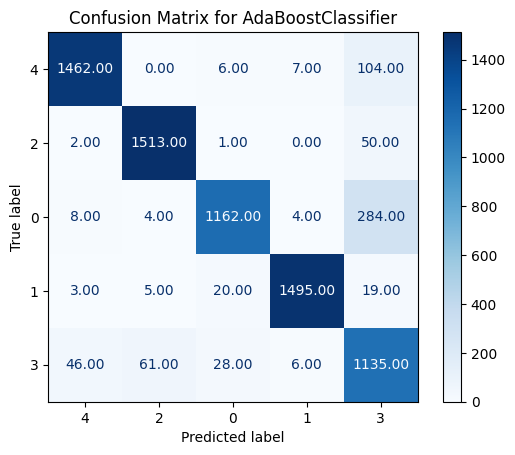

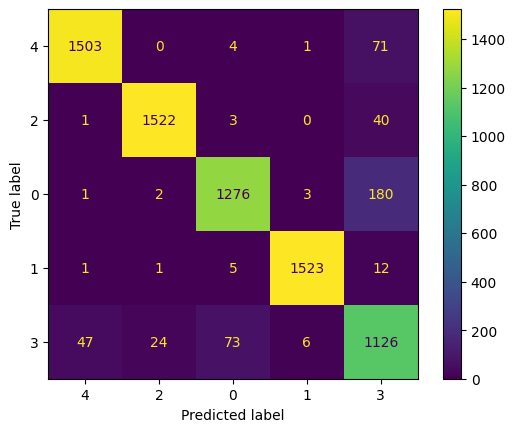

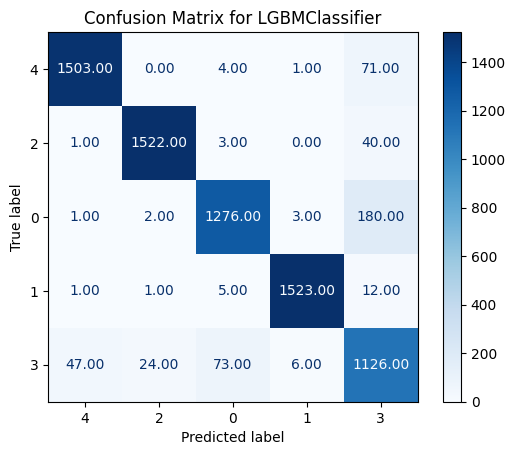

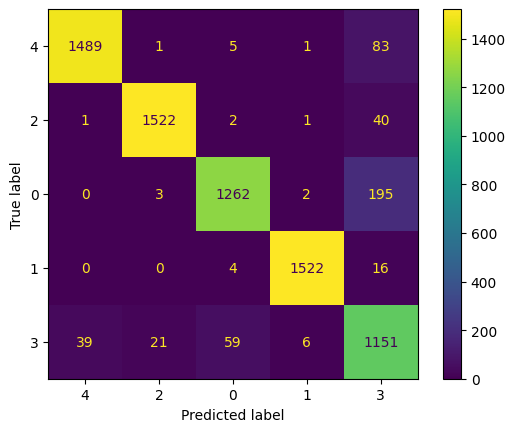

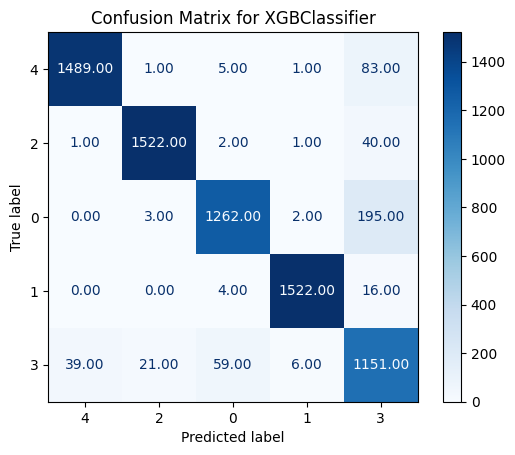

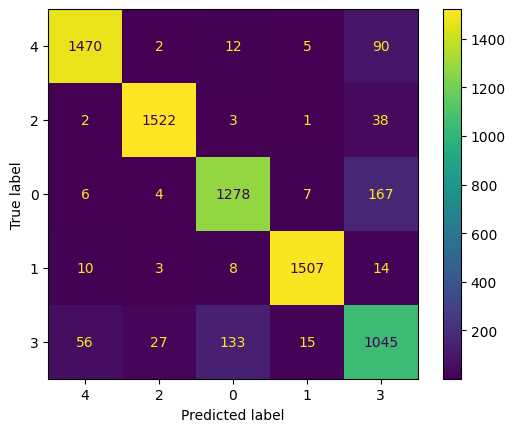

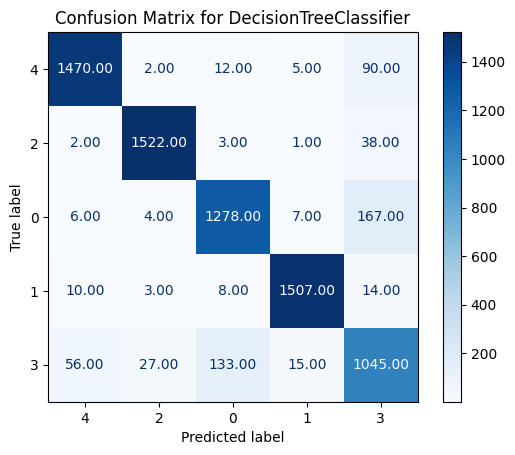

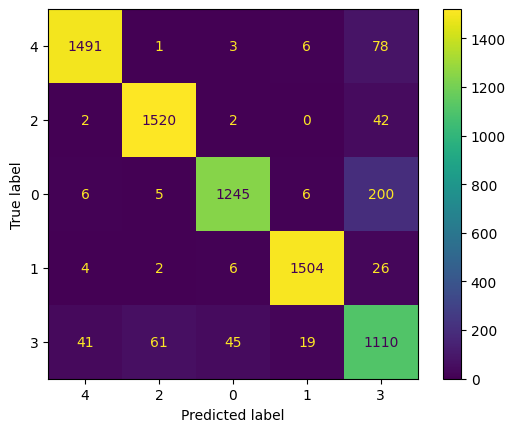

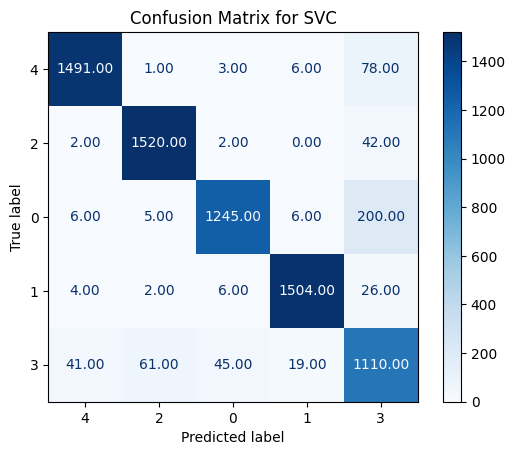

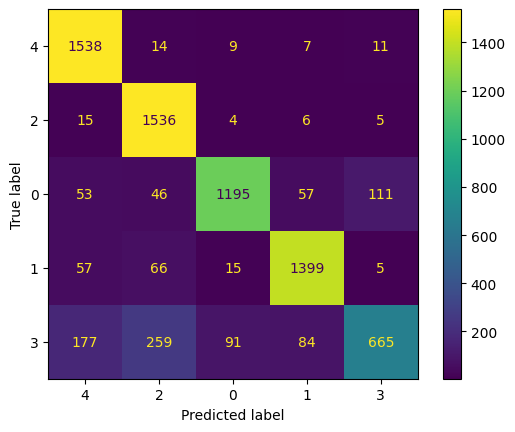

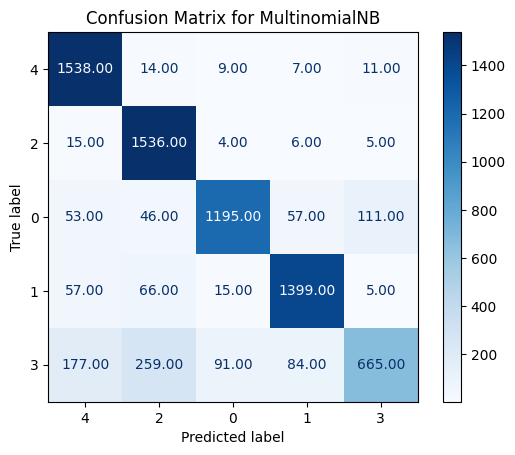

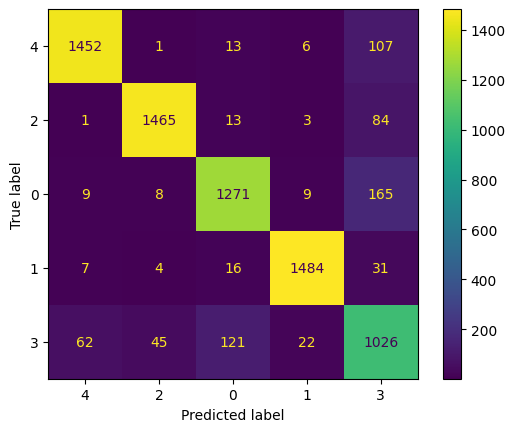

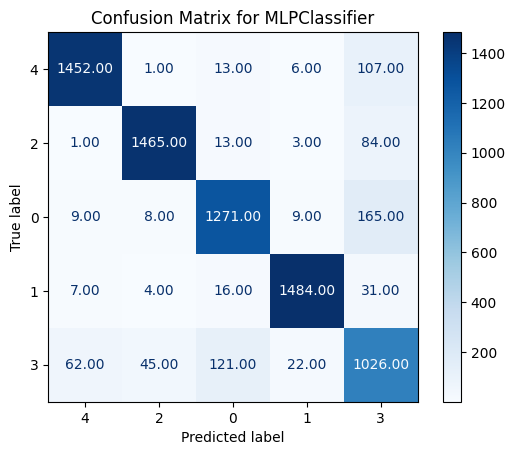

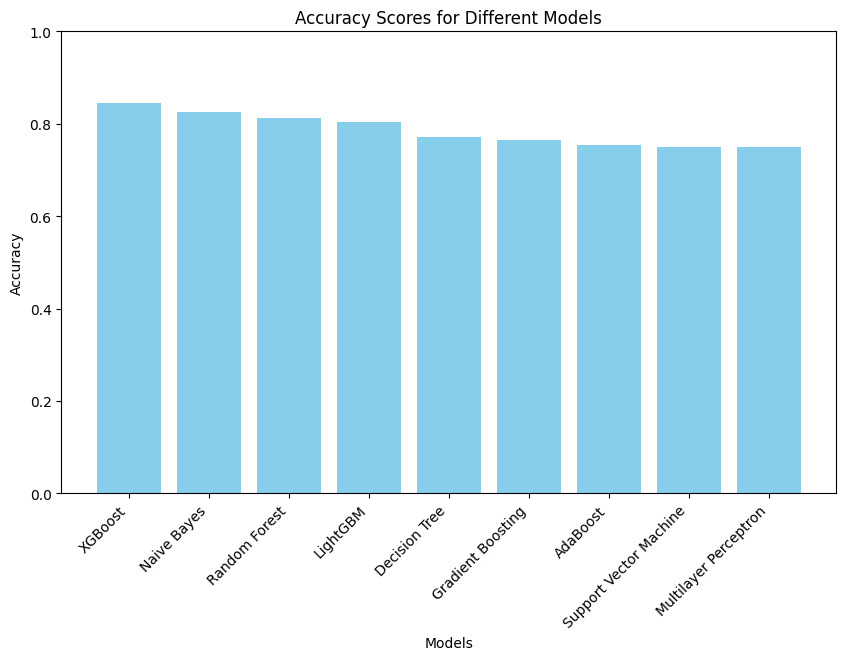

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# ... (previous code)

# Function to plot the accuracy curve
def plot_accuracy_curve(models, accuracies):
    plt.figure(figsize=(10, 6))
    plt.bar(models, accuracies, color='skyblue')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Scores for Different Models')
    plt.ylim([0, 1])
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Function to generate classification report and confusion matrix
def generate_report_confusion_matrix(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    
    # Classification Report
    print(f"Classification Report for {type(clf).__name__}:\n")
    print(classification_report(y_test, y_pred))
    
from sklearn.metrics import ConfusionMatrixDisplay

# Function to generate confusion matrix
def generate_confusion_matrix(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    
    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=df['sentiment'].unique())
    disp.plot(cmap='Blues', values_format='.2f')
    plt.title(f'Confusion Matrix for {type(clf).__name__}')
    plt.show()

# ... (previous code)

# Loop through classifiers and generate confusion matrices
for name, clf in clfs.items():
    curr_acc = fit_model(clf, X_train_resampled, y_train_resampled, X_test, y_test)
    accuracies.append(curr_acc)
    
    # Generate Confusion Matrix
    generate_confusion_matrix(clf, X_test, y_test)

# Plot the accuracy curve
plot_accuracy_curve(models_df['Models'], models_df['Accuracy Scores'])


# # **Classification Report**

Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1579
           1       0.98      0.98      0.98      1566
           2       0.94      0.87      0.90      1462
           3       0.99      0.99      0.99      1542
           4       0.80      0.89      0.84      1276

    accuracy                           0.94      7425
   macro avg       0.94      0.94      0.93      7425
weighted avg       0.94      0.94      0.94      7425

Classification Report for GradientBoostingClassifier:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1579
           1       0.99      0.97      0.98      1566
           2       0.96      0.84      0.90      1462
           3       0.99      0.98      0.99      1542
           4       0.74      0.92      0.82      1276

    accuracy                           0.93      7425
   macro avg       0.93  

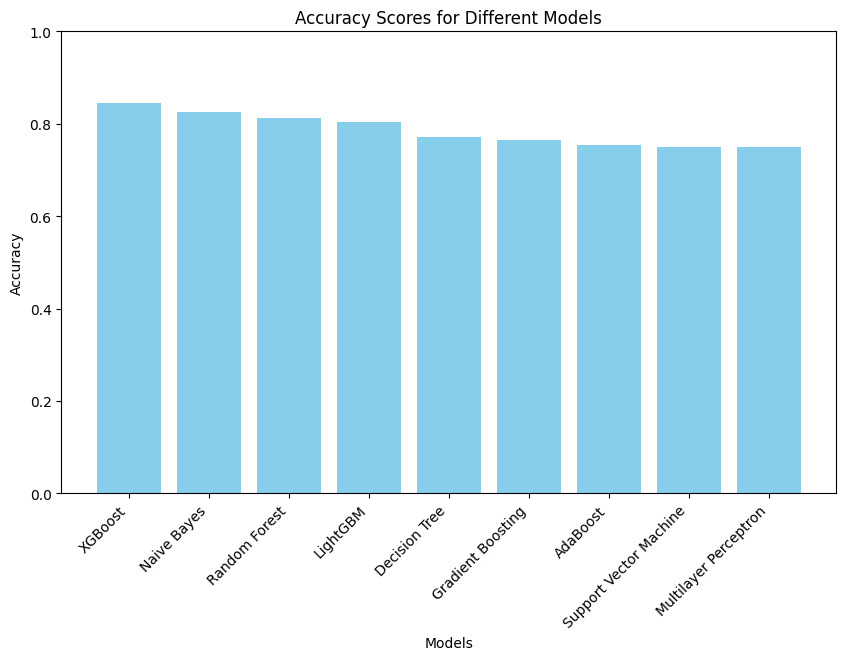

In [93]:
# Loop through classifiers and generate classification reports
for name, clf in clfs.items():
    curr_acc = fit_model(clf, X_train_resampled, y_train_resampled, X_test, y_test)
    accuracies.append(curr_acc)
    
    # Generate Classification Report
    generate_report_confusion_matrix(clf, X_test, y_test)

# Plot the accuracy curve
plot_accuracy_curve(models_df['Models'], models_df['Accuracy Scores'])


# Model Evaluation

In [95]:
# Dictionary to store true labels and predicted labels
results_dict = {"True Labels": y_test}

for name, clf in clfs.items():
    clf.fit(X_train_resampled, y_train_resampled)
    X_test_transformed = tf_transformer.transform(X_test)
    y_pred = clf.predict(X_test_transformed)
    
    # Store predicted labels in the dictionary
    results_dict[f"{type(clf).__name__} Predicted Labels"] = y_pred

# Convert the dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
print(results_df)

       True Labels  RandomForestClassifier Predicted Labels  \
22193            0                                        0   
10978            2                                        2   
34981            1                                        4   
14361            2                                        4   
43676            3                                        3   
...            ...                                      ...   
1127             4                                        4   
41050            3                                        3   
10570            2                                        2   
1976             4                                        4   
35833            1                                        1   

       GradientBoostingClassifier Predicted Labels  \
22193                                            0   
10978                                            2   
34981                                            4   
14361                      